In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/geo airbnb

/content/drive/My Drive/Colab Notebooks/geo airbnb


In [ ]:
% ls

boston-airbnb-geospatial.ipynb  Census2010_Tracts.shp
Census2010_Tracts.dbf           Census2010_Tracts.shp.xml
Census2010_Tracts.prj           Census2010_Tracts.shx
Census2010_Tracts.sbn           listings.csv
Census2010_Tracts.sbx


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 306 kB/s 
     |████████████████████████████████| 6.3 MB 21.5 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import libpysal as lps
import geopandas as gpd
#import contextily as ctx

%matplotlib inline
pd.set_option("max_columns", None)

In [ ]:
#pip install contextily

In [ ]:
listings = pd.read_csv("listings.csv")

In [ ]:
listings.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   
3  There are buses that stop right in front of th...   
4  From Logan Airport  and South Station you have...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   
3  The basement has a washer dryer and gym area. ...   
4  You will have access to the front and side por...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   
3  We do live in the house therefore might be som...   
4  I love my city and really enjoy sharing it wit...   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   
3  - The bathroom and house are shared so please ...   
4  Please no smoking in the house, porch or on th...   

                                       thumb

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [ ]:
listings.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [ ]:
listings.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3580    False
3581    False
3582    False
3583    False
3584    False
Length: 3585, dtype: bool

In [ ]:
len(listings)

3585

In [ ]:
listings1 = listings.drop(['id','scrape_id','host_id','neighbourhood_group_cleansed','license','jurisdiction_names','has_availability'], axis=1)




In [ ]:
listings1.corr()

host_listings_count  \
host_listings_count                        1.000000   
host_total_listings_count                  1.000000   
latitude                                   0.124228   
longitude                                  0.044281   
accommodates                               0.160164   
bathrooms                                  0.170443   
bedrooms                                   0.141611   
beds                                       0.038048   
square_feet                               -0.028763   
guests_included                           -0.105023   
minimum_nights                             0.057400   
maximum_nights                            -0.004450   
availability_30                            0.472413   
availability_60                            0.420898   
availability_90                            0.376304   
availability_365                           0.058604   
number_of_reviews                         -0.140612   
review_scores_rating                      -0.125055   
review_scores_accuracy                    -0.177580   
review_scores_cleanliness                 -0.019006   
review_scores_checkin                     -0.213198   
review_scores_communication               -0.246705   
review_scores_location                     0.015595   
review_scores_value                       -0.207200   
calculated_host_listings_count             0.970535   
reviews_per_month                         -0.193939   

                                host_total_listings_count  latitude  \
host_listings_count                              1.000000  0.124228   
host_total_listings_count                        1.000000  0.124228   
latitude                                         0.124228  1.000000   
longitude                                        0.044281  0.319327   
accommodates                                     0.160164  0.053818   
bathrooms                                        0.170443 -0.020733   
bedrooms                                         0.141611 -0.045471   
beds                                             0.038048 -0.012382   
square_feet                                     -0.028763 -0.074430   
guests_included                                 -0.105023 -0.019589   
minimum_nights                                   0.057400  0.020135   
maximum_nights                                  -0.004450  0.017591   
availability_30                                  0.472413  0.004026   
availability_60                                  0.420898 -0.019708   
availability_90                                  0.376304 -0.034473   
availability_365                                 0.058604 -0.099346   
number_of_reviews                               -0.140612 -0.039188   
review_scores_rating                            -0.125055 -0.014511   
review_scores_accuracy                          -0.177580 -0.040302   
review_scores_cleanliness                       -0.019006  0.001623   
review_scores_checkin                           -0.213198 -0.074478   
review_scores_communication                     -0.246705 -0.053077   
review_scores_location                           0.015595  0.229395   
review_scores_value                             -0.207200 -0.038994   
calculated_host_listings_count                   0.970535  0.125827   
reviews_per_month                               -0.193939  0.049496   

                                longitude  accommodates  bathrooms  bedrooms  \
host_listings_count              0.044281      0.160164   0.170443  0.141611   
host_total_listings_count        0.044281      0.160164   0.170443  0.141611   
latitude                         0.319327      0.053818  -0.020733 -0.045471   
longitude                        1.000000      0.083658   0.010164  0.015721   
accommodates                     0.083658      1.000000   0.346914  0.724826   
bathrooms                        0.010164      0.346914   1.000000  0.430854   
bedrooms                         0.015721      0.724826   0.430854  

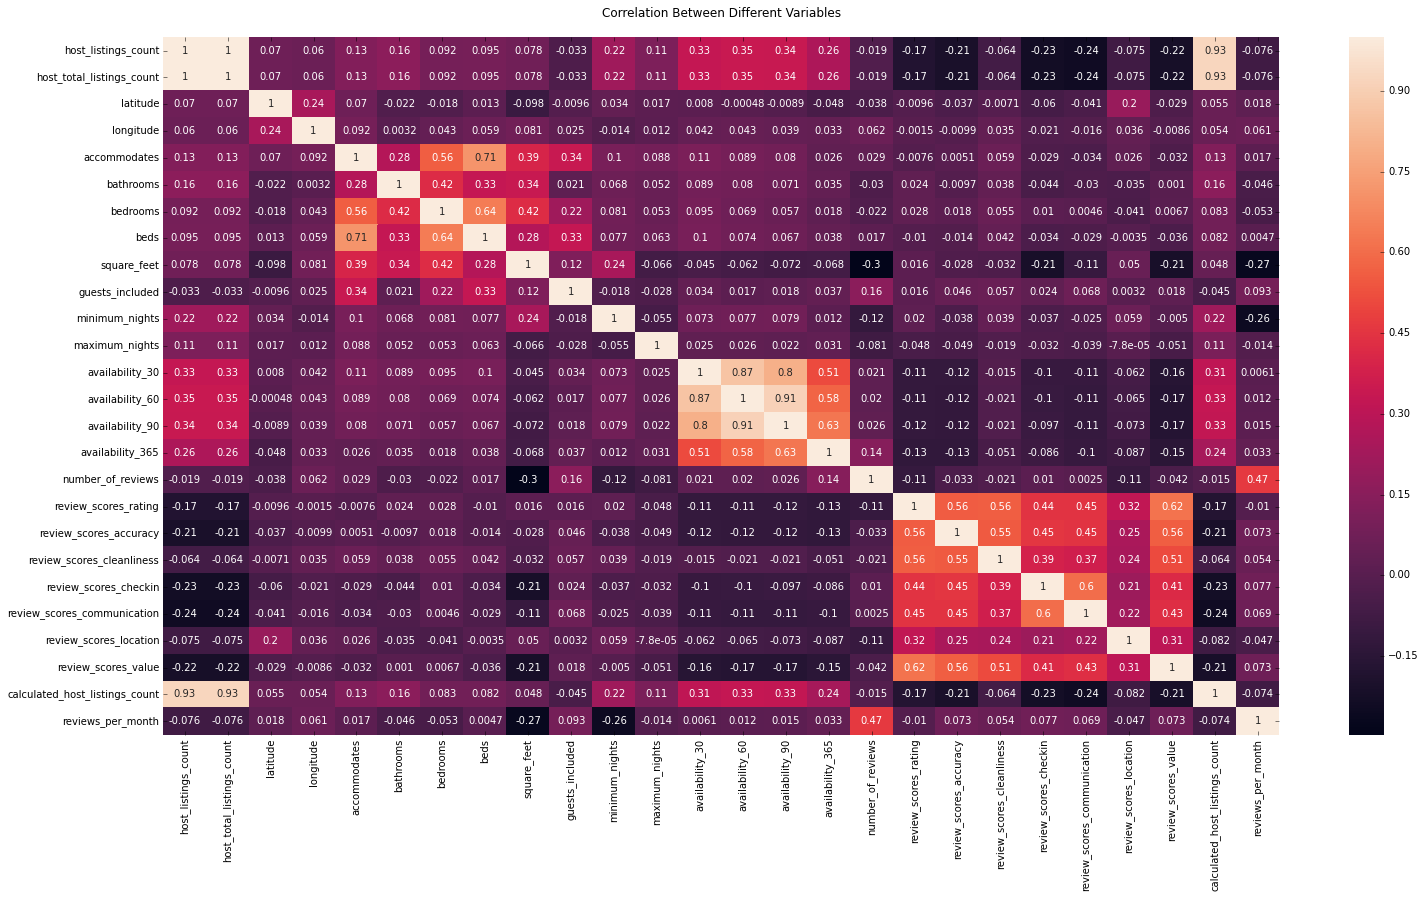

In [ ]:
corr =listings1.corr(method='kendall')
plt.figure(figsize=(25,12.5))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

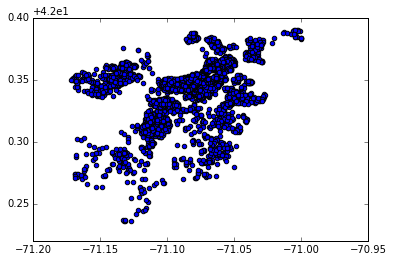

In [ ]:
plt.scatter(listings['longitude'], listings['latitude'])

In [ ]:
listings.neighbourhood.unique()

array(['Roslindale', nan, 'Jamaica Plain', 'Mission Hill',
       'Fenway/Kenmore', 'Back Bay', 'Leather District', 'Chinatown',
       'Hyde Park', 'North End', 'Roxbury', 'South End', 'Mattapan',
       'East Boston', 'South Boston', 'Charlestown', 'West End',
       'Beacon Hill', 'Theater District', 'Downtown Crossing', 'Downtown',
       'Financial District', 'Government Center', 'Allston-Brighton',
       'West Roxbury', 'Chestnut Hill', 'Dorchester', 'Brookline',
       'Cambridge', 'Somerville', 'Harvard Square'], dtype=object)

In [ ]:
listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
top_host=listings.host_id.value_counts().head(10)
top_host

30283594    136
25188        79
9419684      61
12243051     58
22348222     50
4962900      25
21184200     24
26956083     24
1444340      24
16186589     20
Name: host_id, dtype: int64

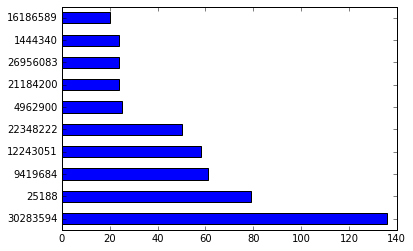

In [ ]:
listings.host_id.value_counts().head(10).plot(kind='barh')

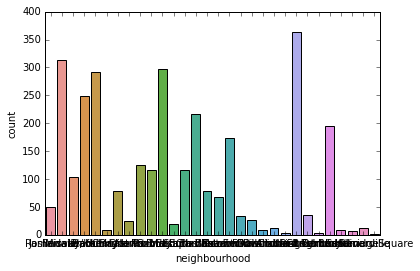

In [ ]:
sns.countplot(x="neighbourhood",data=listings)
#Neighbourhood group wise distribution of airbnbs - This graph below is a plot between Neighbourhood groups and the number of airbnbs that are in that area.

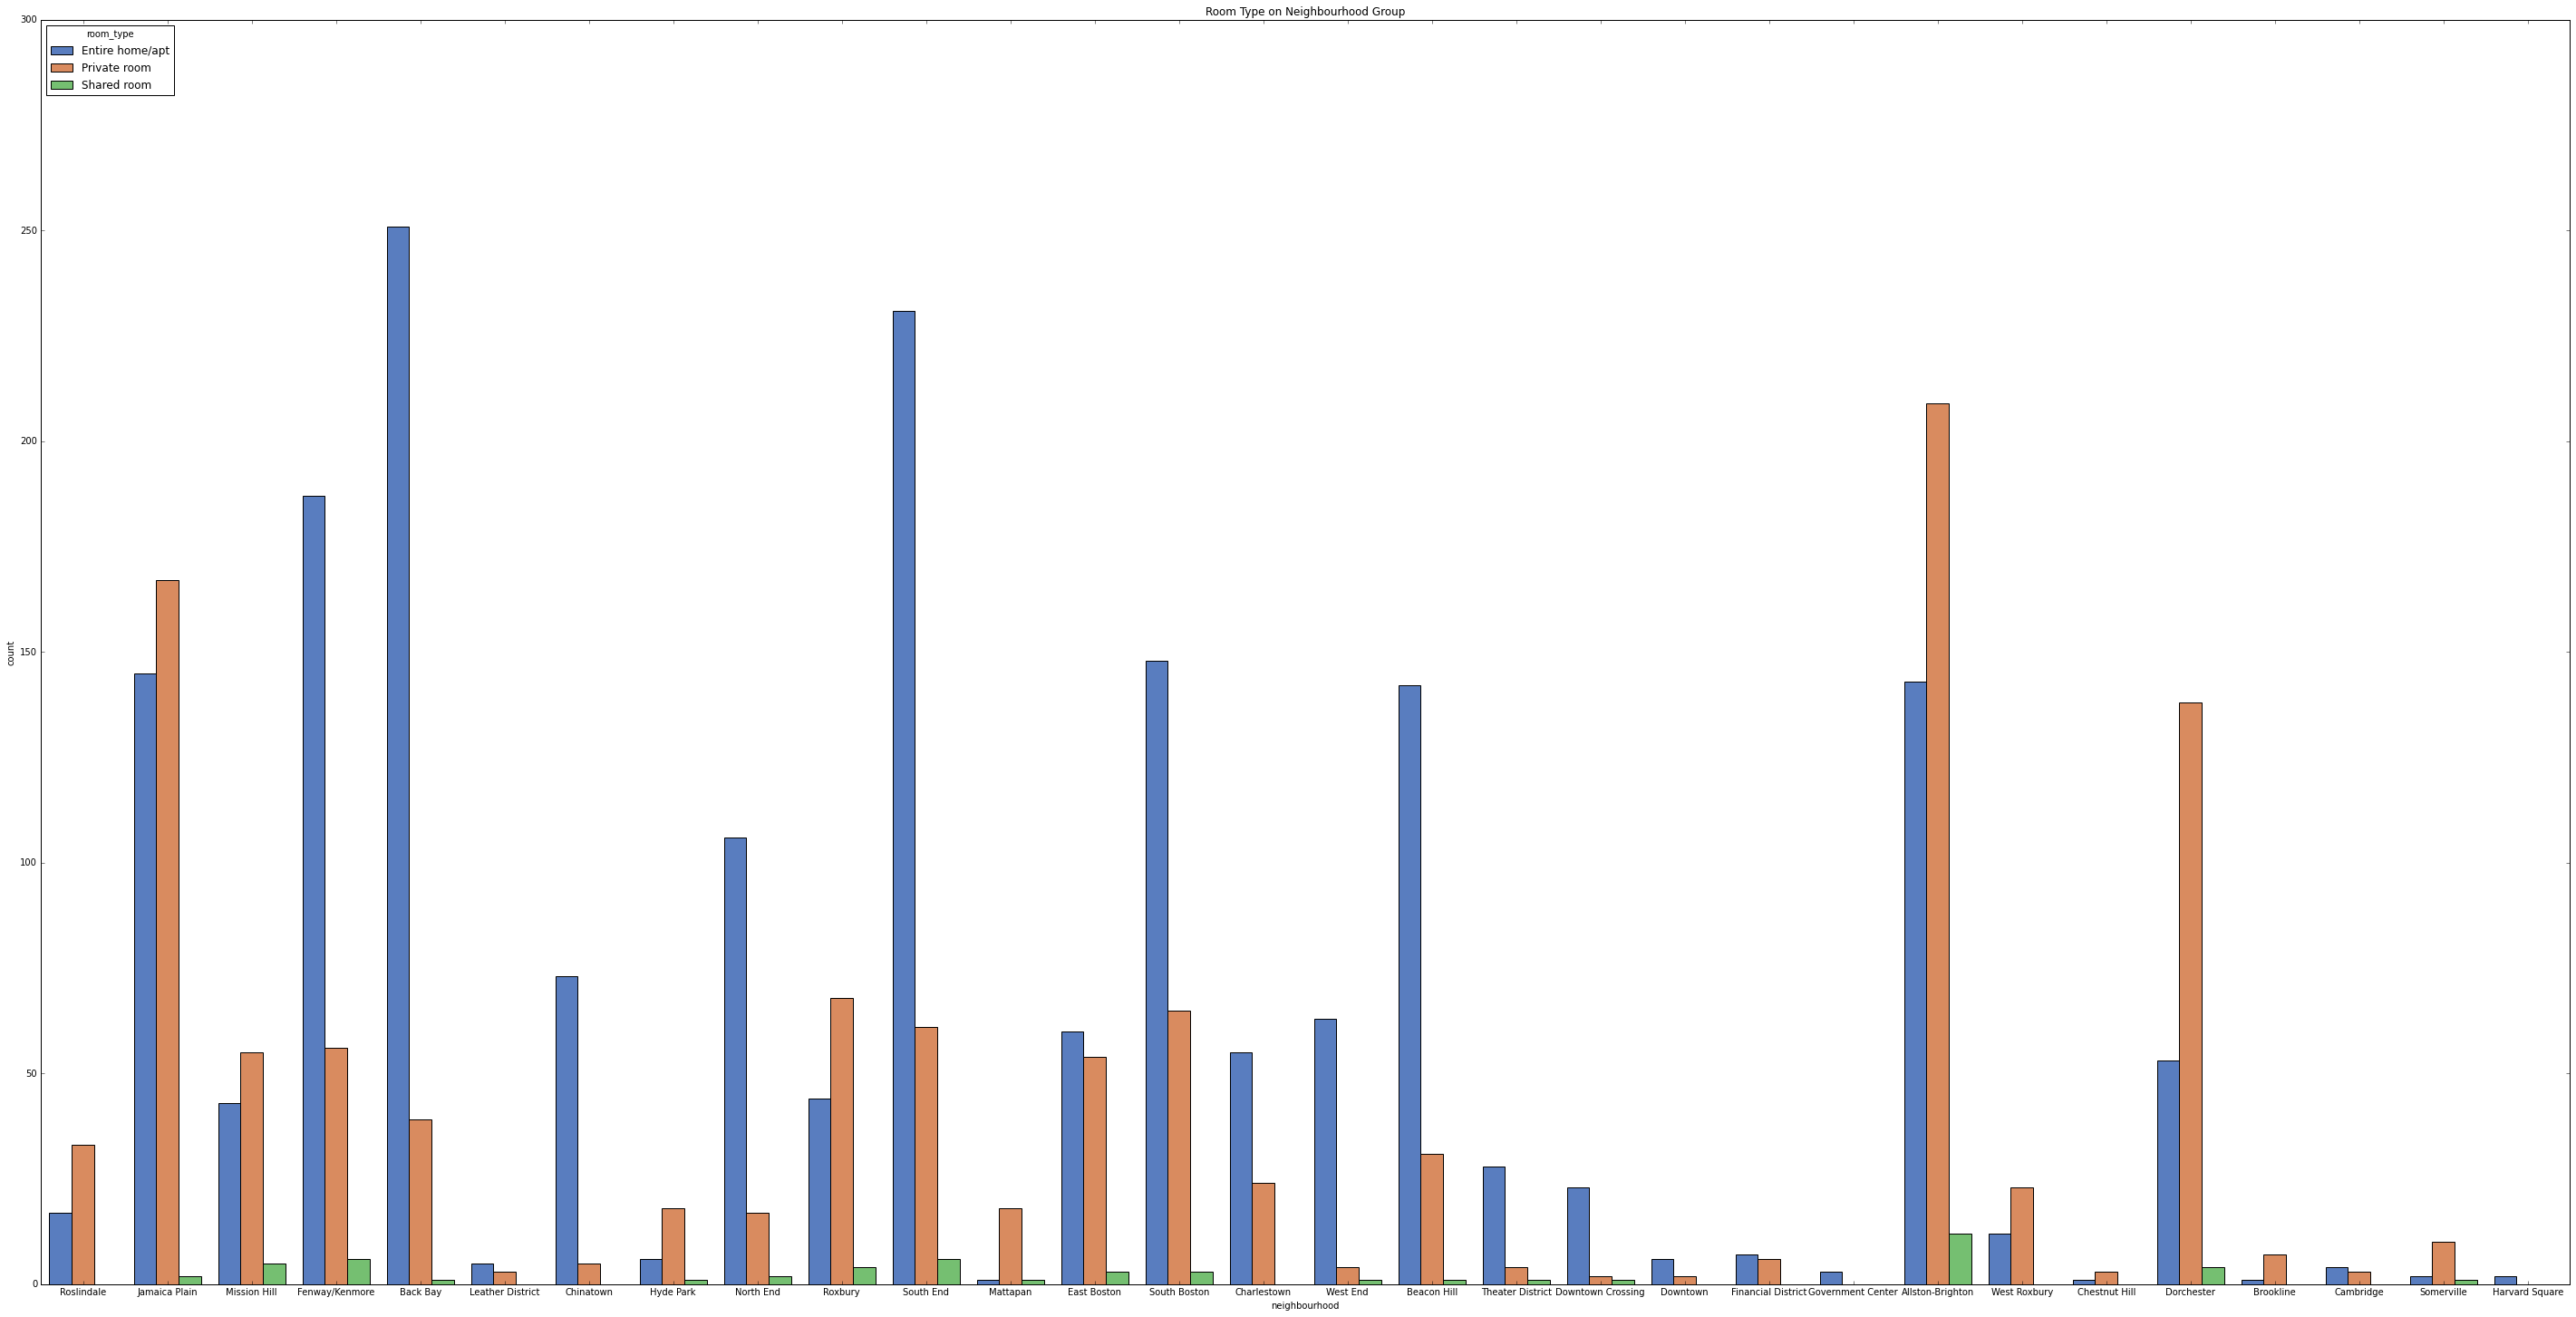

In [ ]:
plt.figure(figsize=(50,25))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(listings.neighbourhood,hue=listings.room_type, palette="muted")
plt.show()

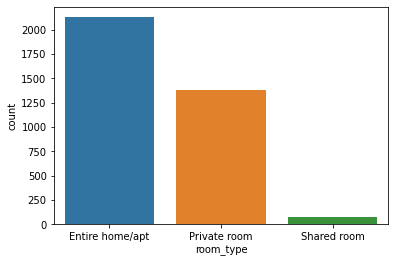

In [ ]:
sns.countplot(x="room_type",data=listings)
#room type distribution of airbnbs - This graph below is a plot between room types and the number of airbnbs that are of that type.

#From this graph we infer the maximum number of airbnbs in the whole of NYC are that of entire room type.

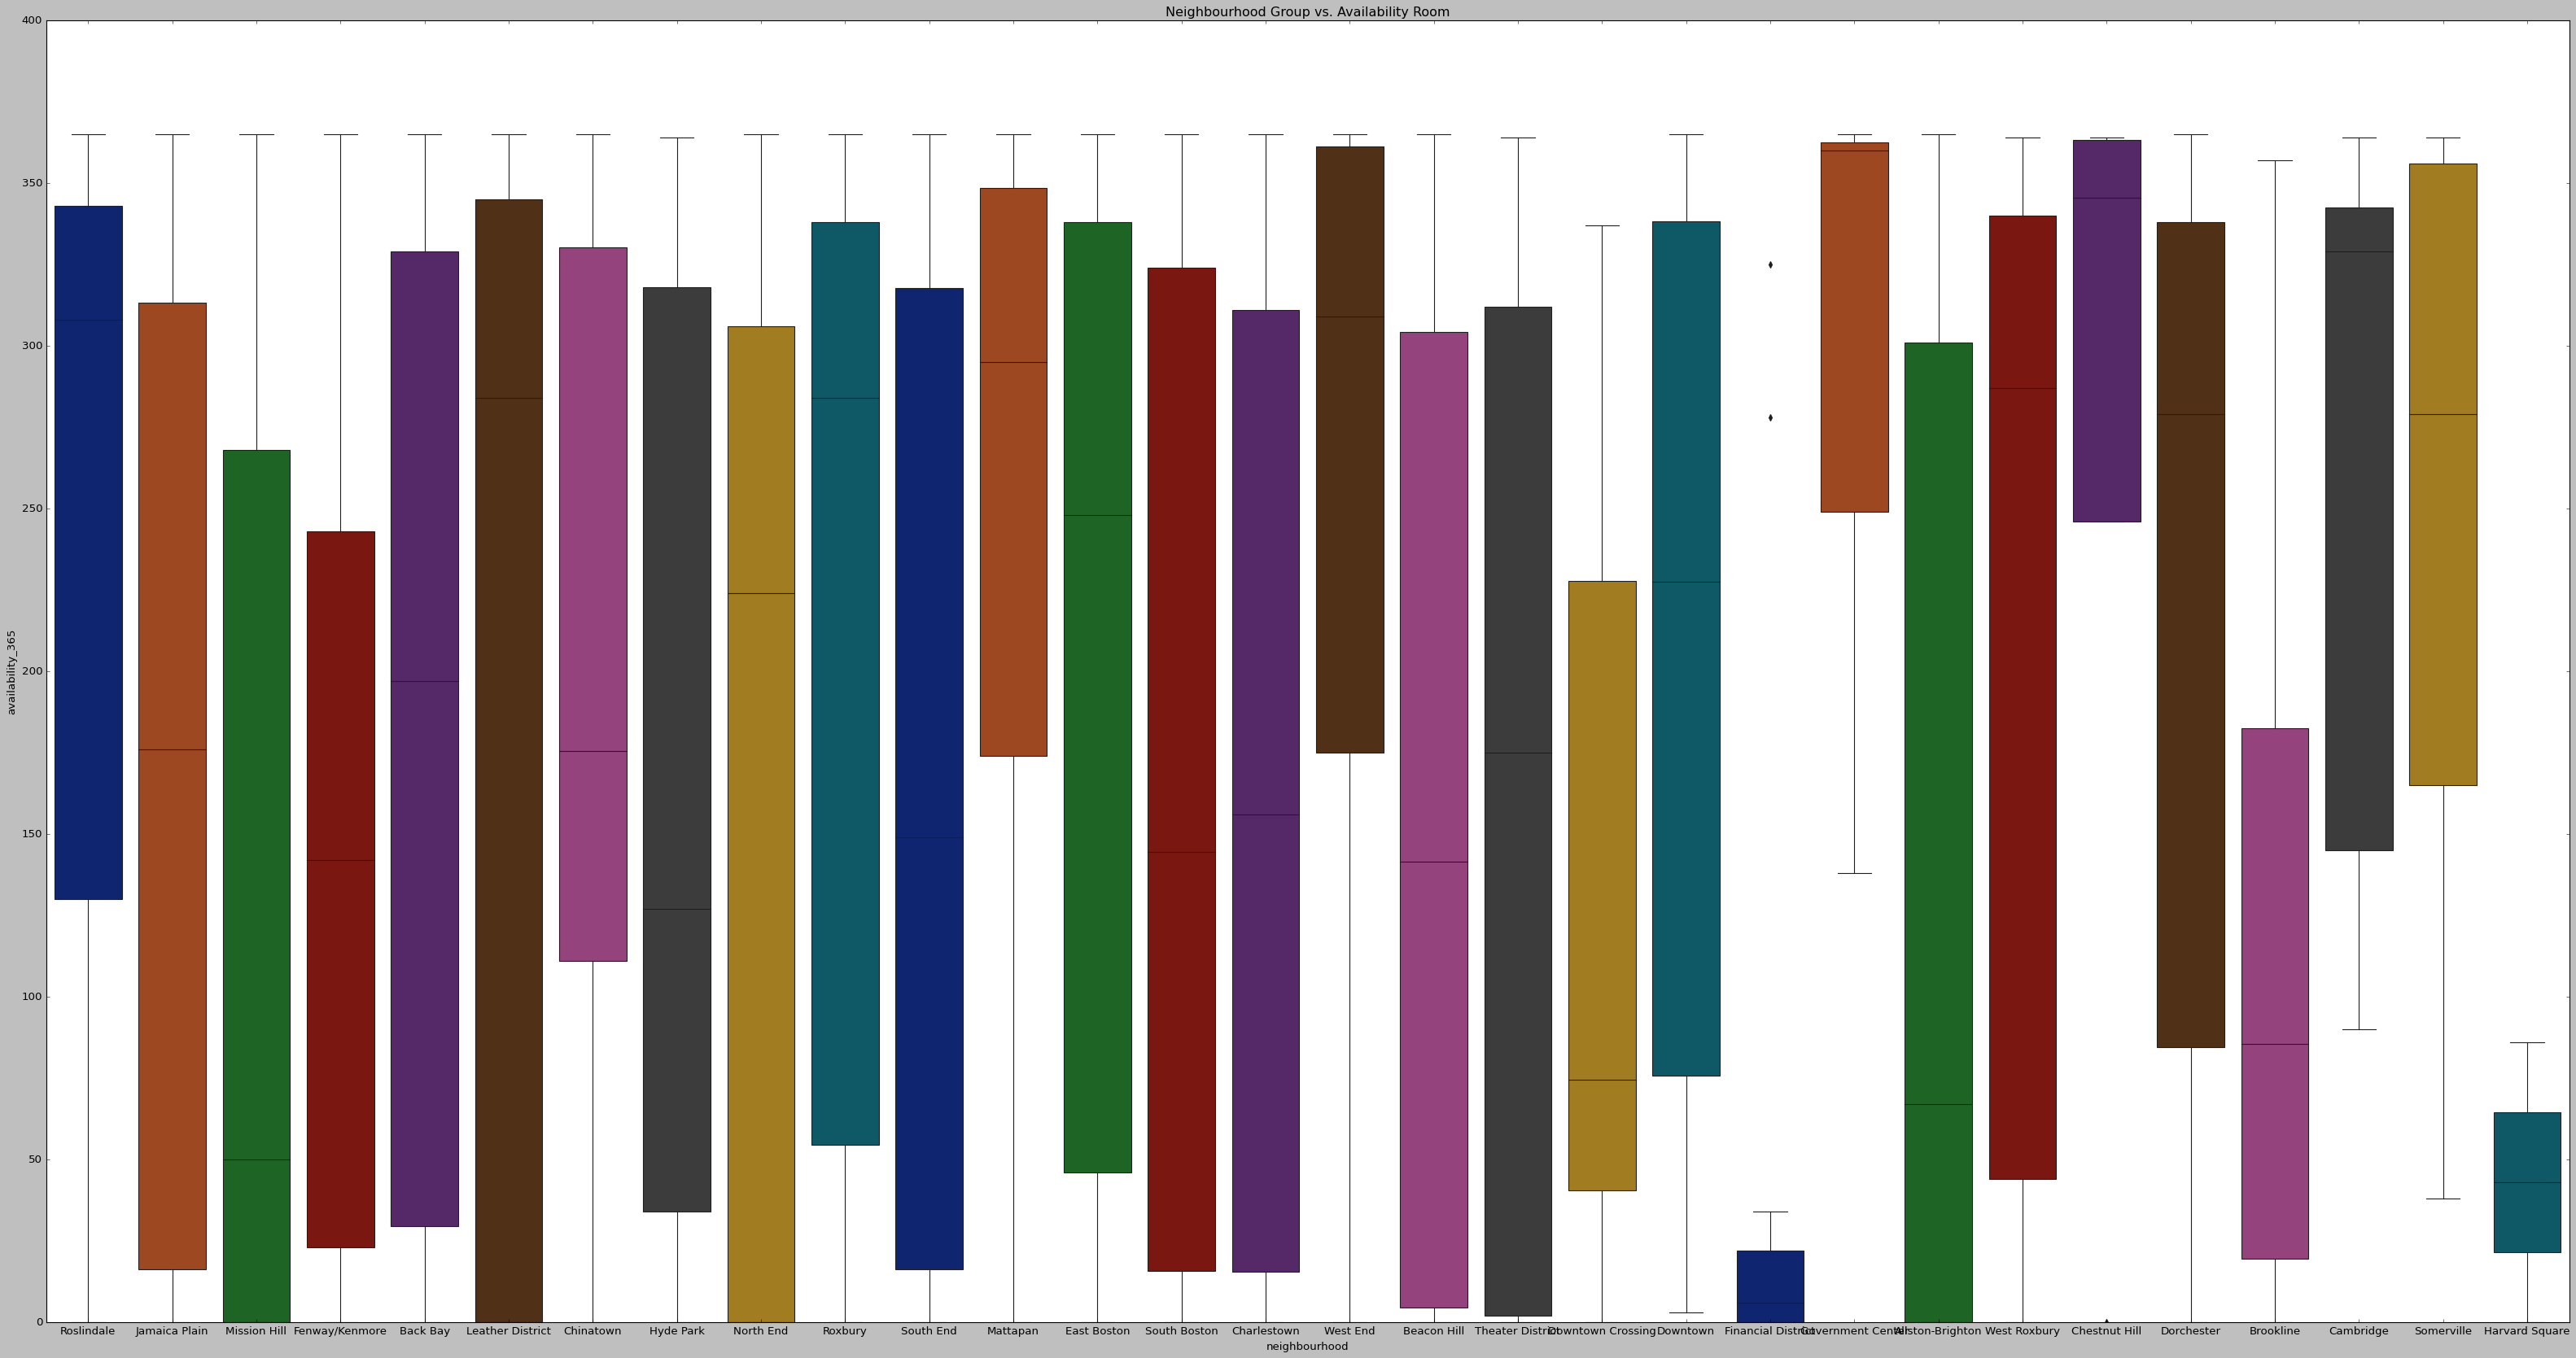

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(50,25))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=listings, x='neighbourhood',y='availability_365',palette="dark")
plt.show()

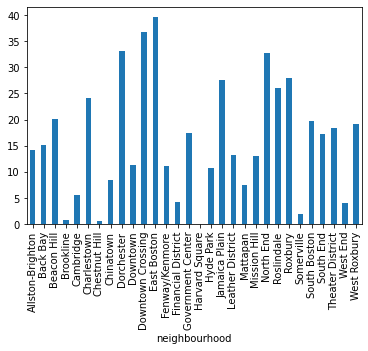

In [ ]:
# **plot between number neighbourhood group Vs the sum and the mean of number of reviews in that place**
numbrev=listings.groupby('neighbourhood')['number_of_reviews'].mean()
numbrev.plot(kind='bar')

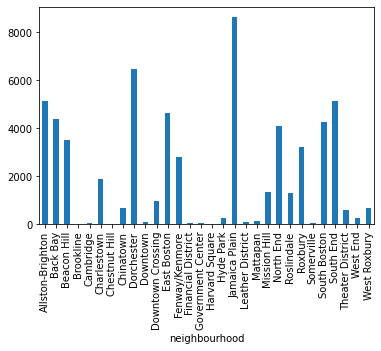

In [ ]:
numbrev=listings.groupby('neighbourhood')['number_of_reviews'].sum()
numbrev.plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


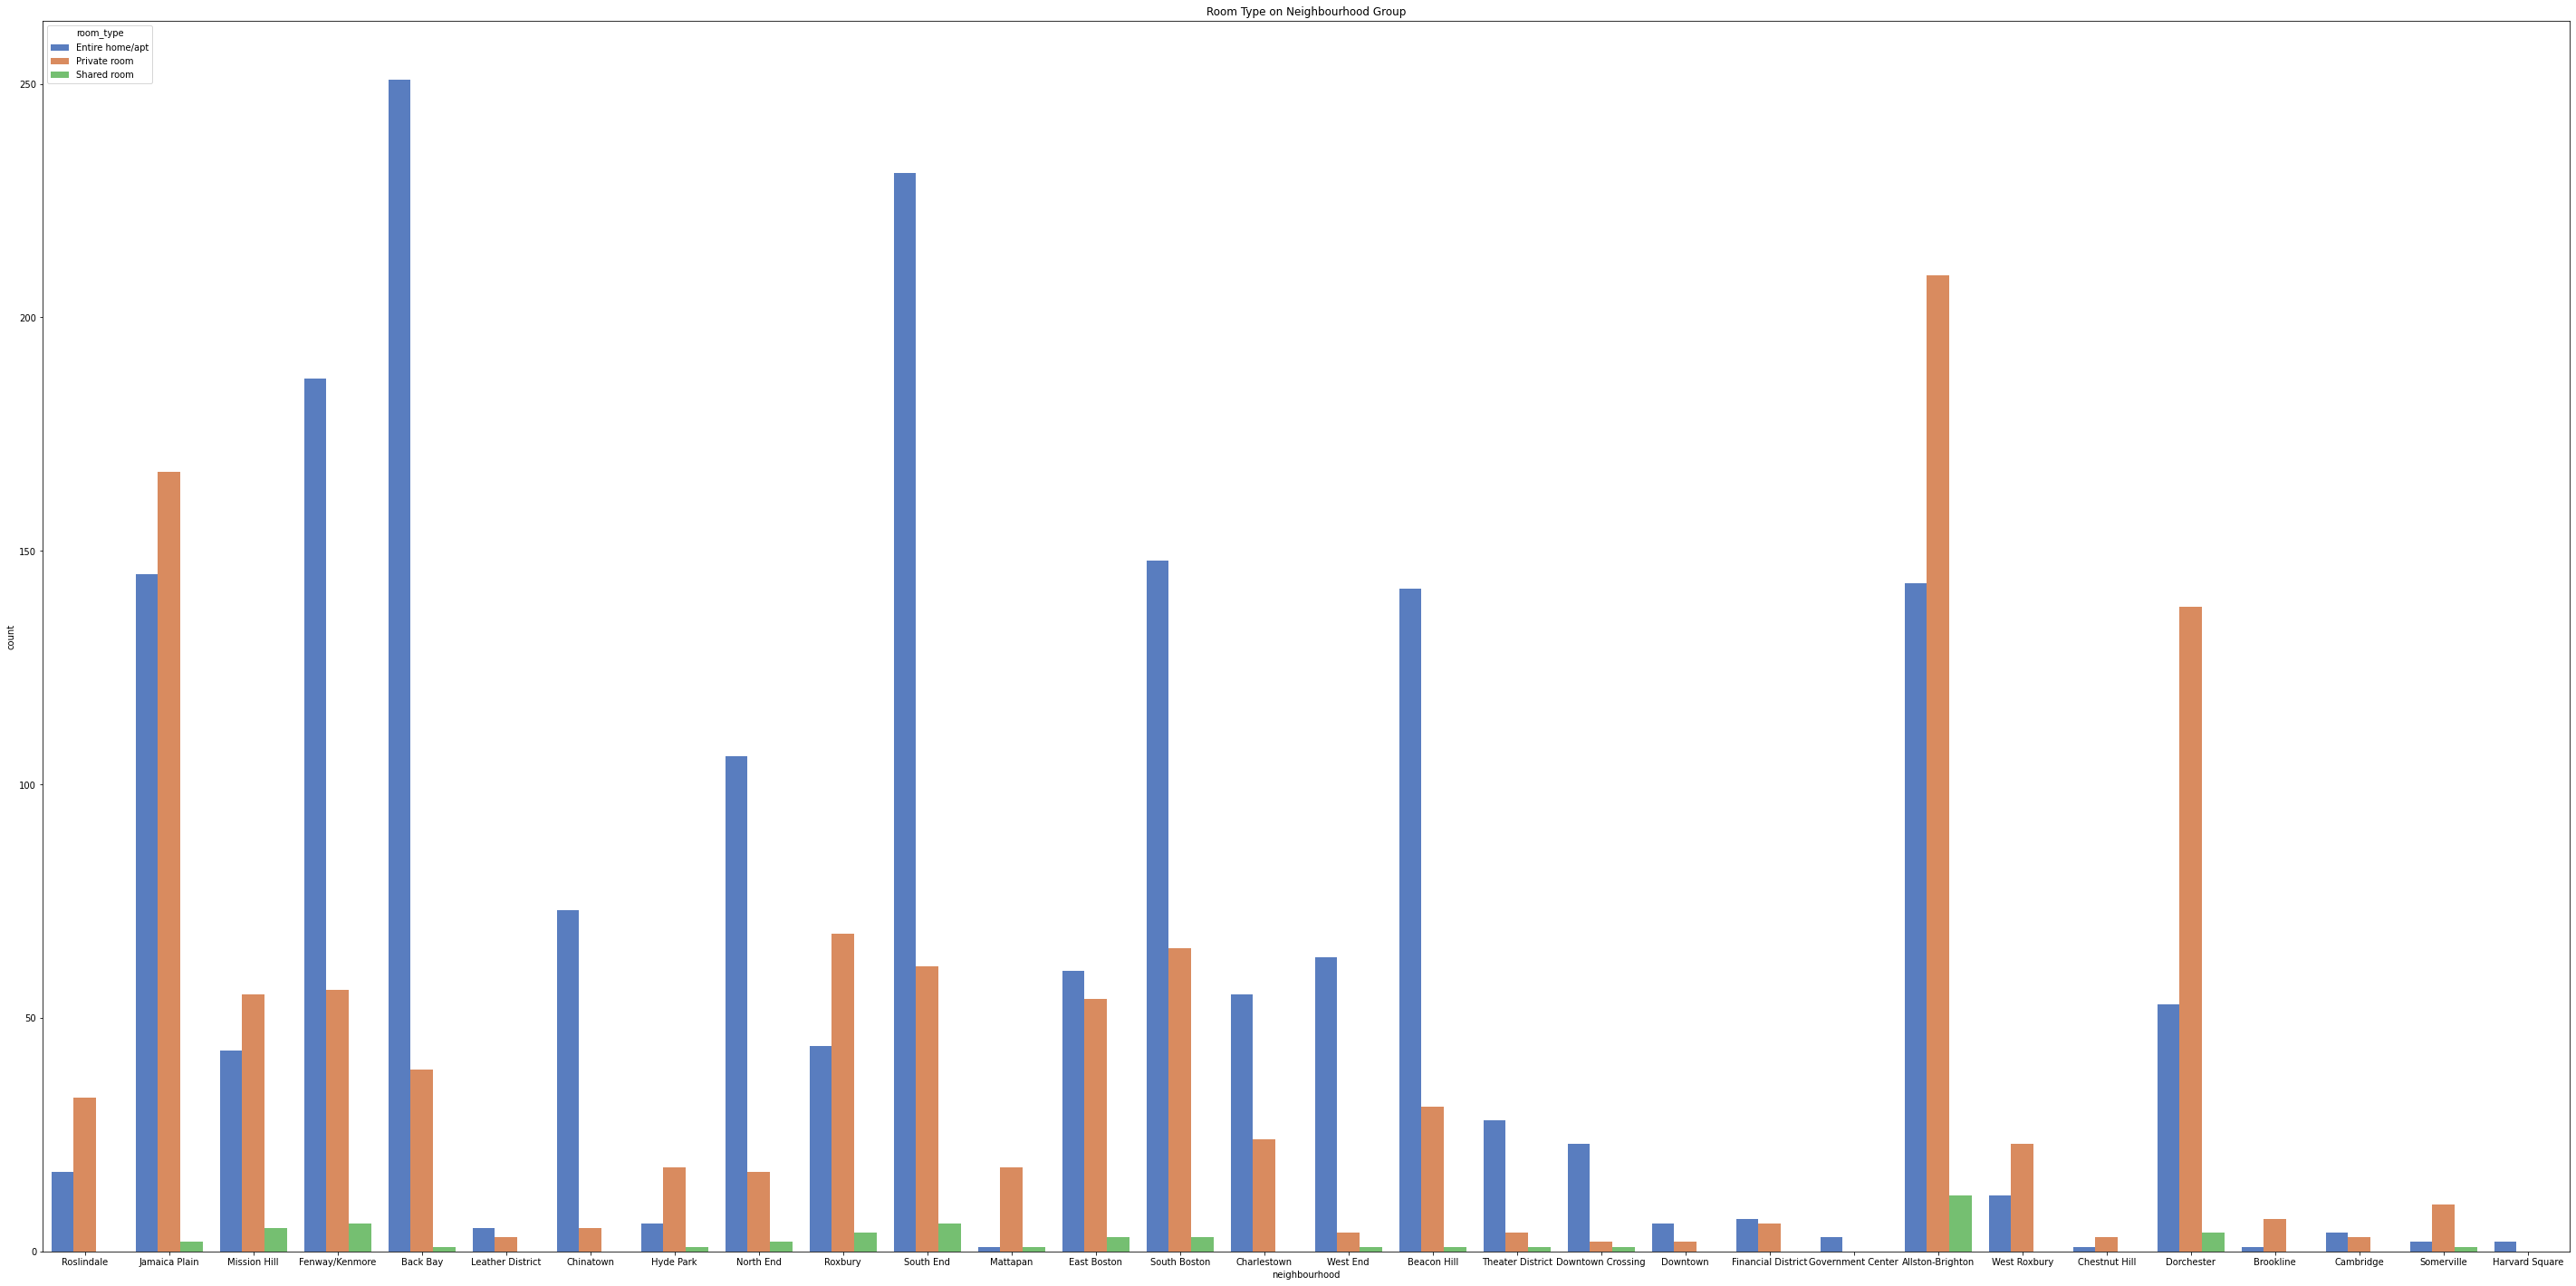

In [ ]:
plt.figure(figsize=(50,25))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(listings.neighbourhood,hue=listings.room_type, palette="muted")
plt.show()

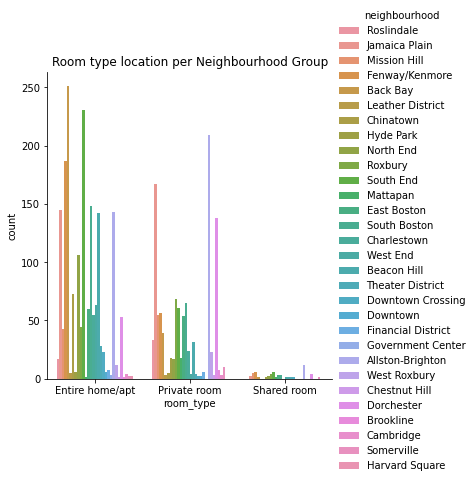

In [ ]:
#Category count plot between room type and neighbourhood group
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood", data=listings);
plt.title(title)
plt.ioff()

In [ ]:
listings.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

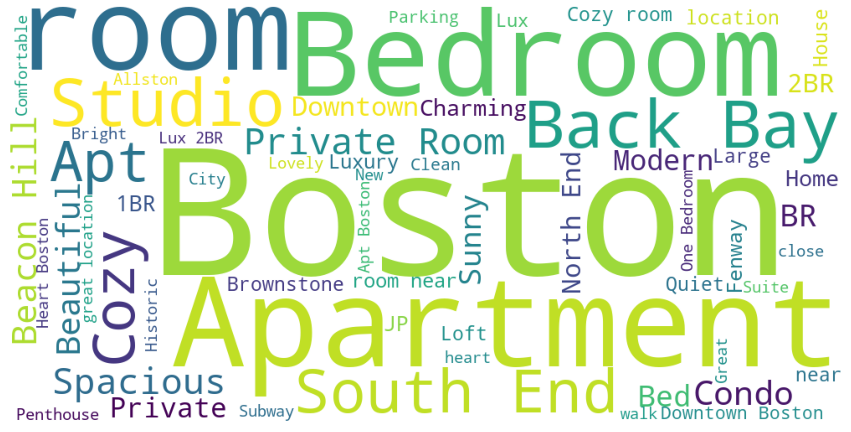

In [ ]:
from wordcloud import WordCloud
name = " ".join(str(w) for w in listings.name)
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1000,
                          height=500,max_words=60
                         ).generate(name)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

In [ ]:
# **which place in NYC has the highest priced Airbnb and which neighbourhood and neighbourhood group has an average highest price?**
maxprice=listings.price.max()
listings.loc[listings['price'] == maxprice]

id                            listing_url       scrape_id  \
2485  12184433  https://www.airbnb.com/rooms/12184433  20160906204935   

     last_scraped                  name  \
2485   2016-09-07  Private Room for You   

                                                summary space  \
2485  23 winship, brighton Room 6 Private room for y...   NaN   

                                            description experiences_offered  \
2485  23 winship, brighton Room 6 Private room for y...                none   

     neighborhood_overview notes transit access interaction house_rules  \
2485                   NaN   NaN     NaN    NaN         NaN         NaN   

     thumbnail_url medium_url  \
2485           NaN        NaN   

                                            picture_url xl_picture_url  \
2485  https://a2.muscache.com/im/pictures/df57b292-6...            NaN   

       host_id                                    host_url host_name  \
2485  65476280  https://www.airbnb.com/users/show/65476280    Marvin   

      host_since host_location host_about  host_response_time  \
2485  2016-04-02            US        NaN  a few days or more   

     host_response_rate host_acceptance_rate host_is_superhost  \
2485                 0%                 100%                 f   

                                     host_thumbnail_url  \
2485  https://a2.muscache.com/im/pictures/ae93cbbc-a...   

                                       host_picture_url host_neighbourhood  \
2485  https://a2.muscache.com/im/pictures/ae93cbbc-a...   Allston-Brighton   

      host_listings_count  host_total_listings_count  host_verifications  \
2485                    1                          1  ['email', 'phone']   

     host_has_profile_pic host_identity_verified  \
2485                    t                      f   

                                               street     neighbourhood  \
2485  Winship Street, Boston, MA 02135, United States  Allston-Brighton   

     neighbourhood_cleansed  neighbourhood_group_cleansed    city state  \
2485               Brighton                           NaN  Boston    MA   

     zipcode  market smart_location country_code        country   latitude  \
2485   02135  Boston     Boston, MA           US  United States  42.349078   

      longitude is_location_exact property_type     room_type  accommodates  \
2485 -71.152605                 t     Apartment  Private room             1   

      bathrooms  bedrooms  beds  bed_type  \
2485        1.0       1.0   1.0  Real Bed   

                                              amenities  square_feet    price  \
2485  {Internet,"Wireless Internet","Air Conditionin...          NaN  $999.00   

     weekly_price monthly_price security_deposit cleaning_fee  \
2485          NaN           NaN              NaN          NaN   

      guests_included extra_people  minimum_nights  maximum_nights  \
2485                1        $0.00               1            1125   

     calendar_updated  has_availability  availability_30  availability_60  \
2485     5 months ago               NaN               30               60   

      availability_90  availability_365 calendar_last_scraped  \
2485               90               365            2016-09-06   

      number_of_reviews first_review last_review  review_scores_rating  \
2485                  0          NaN         NaN                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
2485                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
2485                    NaN                          NaN   

      review_scores_location  review_scores_value requires_license  license  \
2485                     NaN                  NaN                f      NaN   

      jurisdiction_names instant_bookable cancellation_policy  \
2485                 NaN                f            flexible   

     require_guest_profile_picture require_guest_phone_verification  

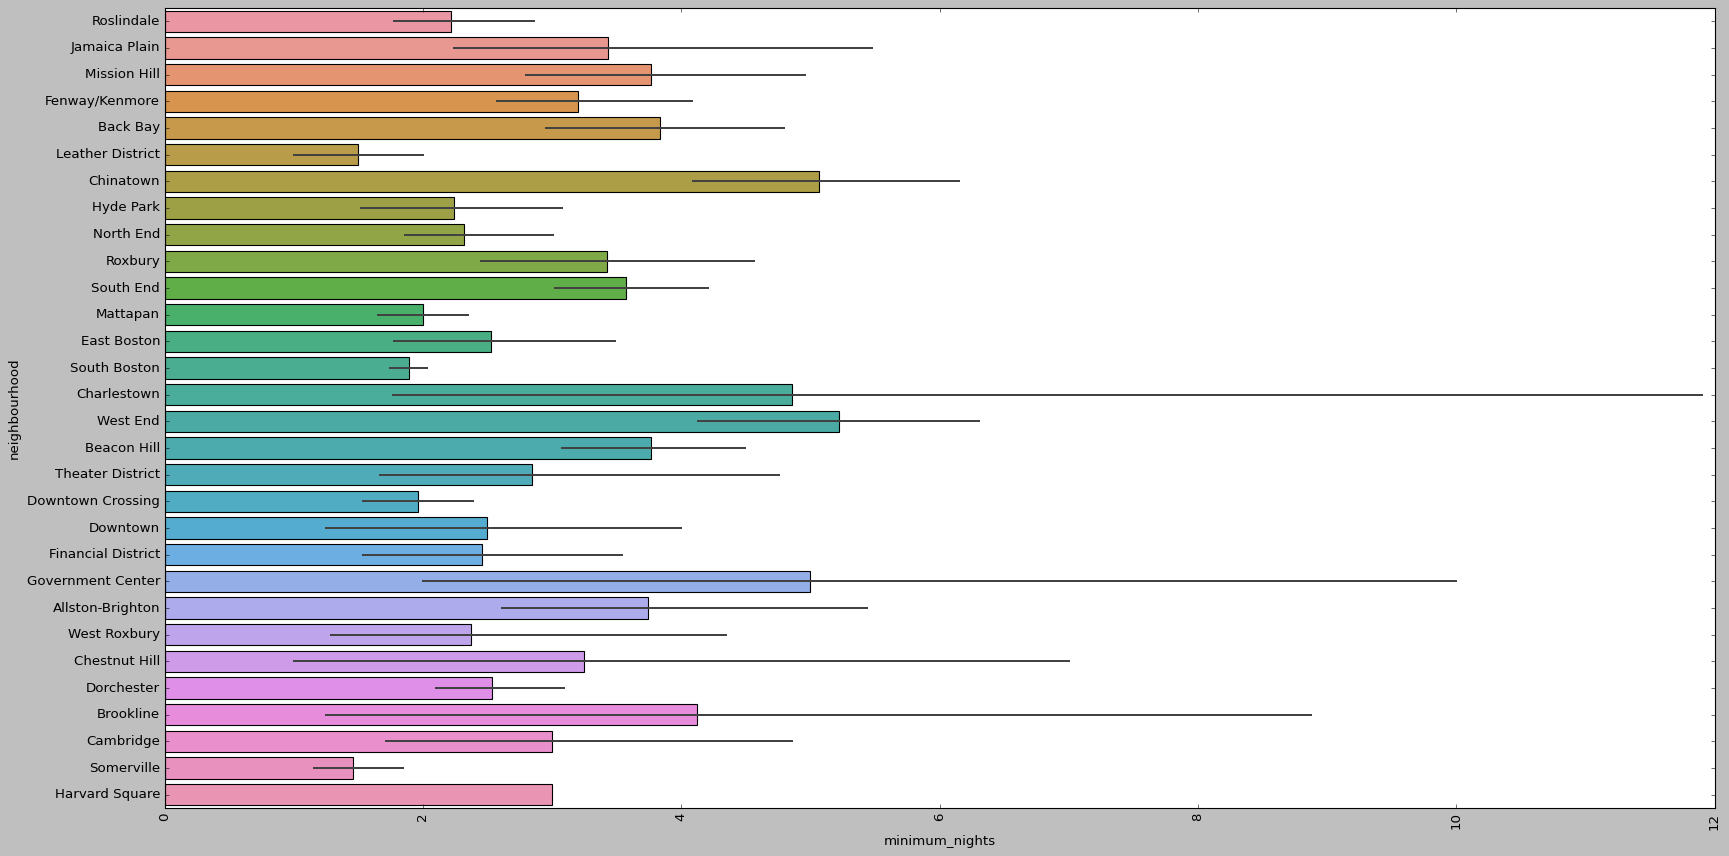

In [ ]:
plt.figure(figsize=(25,12.5))
sns.barplot(x=listings.minimum_nights[:3585], y=listings.neighbourhood[:3585]) 
plt.xticks(rotation=90)
plt.show()

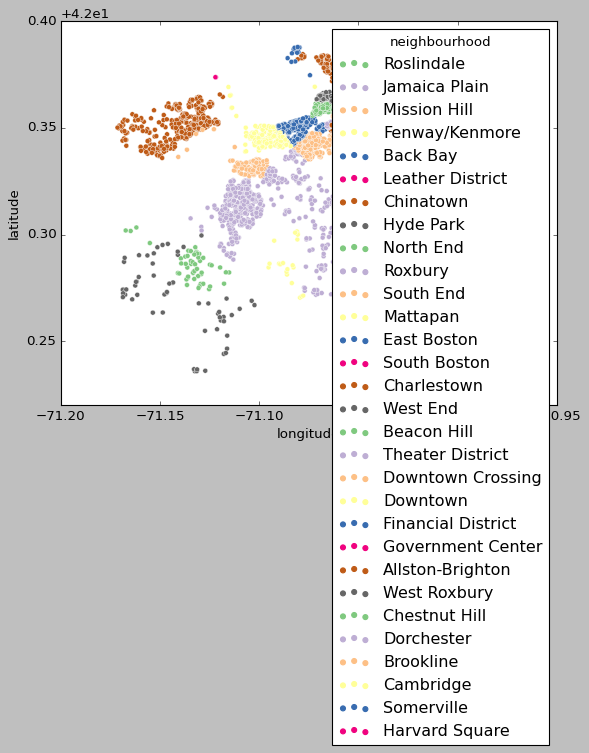

In [ ]:
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.neighbourhood, palette='Accent')

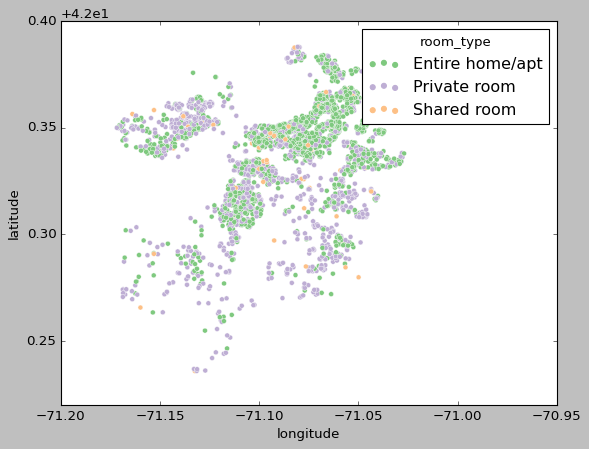

In [ ]:
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.room_type,palette='Accent')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#encode = preprocessing.LabelEncoder()

In [ ]:
#encode.fit(listings.neighbourhood)
#listings.neighbourhood=encode.transform(listings.neighbourhood)

In [ ]:
#encode = preprocessing.LabelEncoder()
#encode.fit(listings.neighbourhood)
#listings.neighbourhood=encode.transform(listings.neighbourhood)
#encode = preprocessing.LabelEncoder()
#encode.fit(listings.room_type)
#listings.room_type=encode.transform(listings.room_type)
#listings.sort_values(by='price',ascending=True,inplace=True)

In [ ]:
#l_reg = LinearRegression()
#X = listings[['neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
#y = listings['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#l_reg.fit(X_train,y_train)

In [ ]:
import mplleaflet

sample = listings.sample(1000)
plt.scatter(sample['longitude'], sample['latitude'])

mplleaflet.display()

In [ ]:
pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=c22cd1c2c5321d9239ce2d5903c72529cd24d20e2e41513af366c0f1dcccf2e6
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 
     |████████████████████████████████| 16.7 MB 43.3 MB/s 


In [ ]:
import geopandas as gpd
boston = gpd.read_file("Census2010_Tracts.shp")
boston

STATEFP10 COUNTYFP10 TRACTCE10      GEOID10  NAME10           NAMELSAD10  \
0          25        025    010405  25025010405  104.05  Census Tract 104.05   
1          25        025    010404  25025010404  104.04  Census Tract 104.04   
2          25        025    010801  25025010801  108.01  Census Tract 108.01   
3          25        025    010702  25025010702  107.02  Census Tract 107.02   
4          25        025    010204  25025010204  102.04  Census Tract 102.04   
..        ...        ...       ...          ...     ...                  ...   
176        25        025    020301  25025020301  203.01  Census Tract 203.01   
177        25        025    020101  25025020101  201.01  Census Tract 201.01   
178        25        025    081001  25025081001  810.01  Census Tract 810.01   
179        25        025    010403  25025010403  104.03  Census Tract 104.03   
180        25        025    000100  25025000100       1       Census Tract 1   

    MTFCC10 FUNCSTAT10    ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
0     G5020          S   363702.0       0.0  +42.3398654  -071.0896052   
1     G5020          S   136829.0       0.0  +42.3419667  -071.0886375   
2     G5020          S   127905.0       0.0  +42.3541193  -071.0770216   
3     G5020          S   299981.0       0.0  +42.3518354  -071.0755159   
4     G5020          S   254706.0       0.0  +42.3462887  -071.1033879   
..      ...        ...        ...       ...          ...           ...   
176   G5020          S   256258.0     328.0  +42.3631745  -071.0686463   
177   G5020          S   223142.0       0.0  +42.3577086  -071.0694112   
178   G5020          S   558488.0       0.0  +42.3345666  -071.1068303   
179   G5020          S    88556.0       0.0  +42.3450750  -071.0880610   
180   G5020          S  1794942.0       0.0  +42.3614845  -071.1385879   

       Shape_Leng    Shape_Area  \
0    14629.550361  3.914568e+06   
1     5277.643216  1.472714e+06   
2     6166.497167  1.376667e+06   
3     7818.852369  3.228780e+06   
4     7621.654206  2.741497e+06   
..            ...           ...   
176  10710.510922  2.761716e+06   
177   7637.223404  2.401693e+06   
178  16640.520998  6.011082e+06   
179   4227.644208  9.531475e+05   
180  28223.059560  1.931928e+07   

                                              geometry  
0    POLYGON ((766978.240 2951616.924, 767000.369 2...  
1    POLYGON ((766835.394 2949104.970, 766736.720 2...  
2    POLYGON ((769261.263 2954196.132, 769572.345 2...  
3    POLYGON ((772221.707 2953536.652, 772276.570 2...  
4    POLYGON ((762449.977 2952359.446, 762888.695 2...  
..                                                 ...  
176  POLYGON ((773685.489 2958034.925, 773667.429 2...  
177  POLYGON ((771692.482 2955685.216, 771755.186 2...  
178  POLYGON ((763006.261 2947000.570, 763001.392 2...  
179  POLYGON ((767046.363 2950773.966, 767068.786 2...  
180  POLYGON ((752445.195 2954518.095, 752343.965 2...  

[181 rows x 15 columns]

In [ ]:
boston.head()

STATEFP10 COUNTYFP10 TRACTCE10      GEOID10  NAME10           NAMELSAD10  \
0        25        025    010405  25025010405  104.05  Census Tract 104.05   
1        25        025    010404  25025010404  104.04  Census Tract 104.04   
2        25        025    010801  25025010801  108.01  Census Tract 108.01   
3        25        025    010702  25025010702  107.02  Census Tract 107.02   
4        25        025    010204  25025010204  102.04  Census Tract 102.04   

  MTFCC10 FUNCSTAT10   ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
0   G5020          S  363702.0       0.0  +42.3398654  -071.0896052   
1   G5020          S  136829.0       0.0  +42.3419667  -071.0886375   
2   G5020          S  127905.0       0.0  +42.3541193  -071.0770216   
3   G5020          S  299981.0       0.0  +42.3518354  -071.0755159   
4   G5020          S  254706.0       0.0  +42.3462887  -071.1033879   

     Shape_Leng    Shape_Area  \
0  14629.550361  3.914568e+06   
1   5277.643216  1.472714e+06   
2   6166.497167  1.376667e+06   
3   7818.852369  3.228780e+06   
4   7621.654206  2.741497e+06   

                                            geometry  
0  POLYGON ((766978.240 2951616.924, 767000.369 2...  
1  POLYGON ((766835.394 2949104.970, 766736.720 2...  
2  POLYGON ((769261.263 2954196.132, 769572.345 2...  
3  POLYGON ((772221.707 2953536.652, 772276.570 2...  
4  POLYGON ((762449.977 2952359.446, 762888.695 2...

In [ ]:
boston.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   181 non-null    object  
 1   COUNTYFP10  181 non-null    object  
 2   TRACTCE10   181 non-null    object  
 3   GEOID10     181 non-null    object  
 4   NAME10      181 non-null    object  
 5   NAMELSAD10  181 non-null    object  
 6   MTFCC10     181 non-null    object  
 7   FUNCSTAT10  181 non-null    object  
 8   ALAND10     181 non-null    float64 
 9   AWATER10    181 non-null    float64 
 10  INTPTLAT10  181 non-null    object  
 11  INTPTLON10  181 non-null    object  
 12  Shape_Leng  181 non-null    float64 
 13  Shape_Area  181 non-null    float64 
 14  geometry    181 non-null    geometry
dtypes: float64(4), geometry(1), object(10)
memory usage: 21.3+ KB


In [ ]:
boston['geometry'].head()

0    POLYGON ((766978.240 2951616.924, 767000.369 2...
1    POLYGON ((766835.394 2949104.970, 766736.720 2...
2    POLYGON ((769261.263 2954196.132, 769572.345 2...
3    POLYGON ((772221.707 2953536.652, 772276.570 2...
4    POLYGON ((762449.977 2952359.446, 762888.695 2...
Name: geometry, dtype: geometry

In [ ]:
boston.crs

<Projected CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
boston = boston.to_crs({'init': 'epsg:4326'})

In [ ]:
boston['geometry'].head()

0    POLYGON ((-71.09009 42.34666, -71.09000 42.346...
1    POLYGON ((-71.09066 42.33977, -71.09103 42.339...
2    POLYGON ((-71.08159 42.35370, -71.08044 42.354...
3    POLYGON ((-71.07066 42.35185, -71.07045 42.351...
4    POLYGON ((-71.10682 42.34875, -71.10520 42.348...
Name: geometry, dtype: geometry

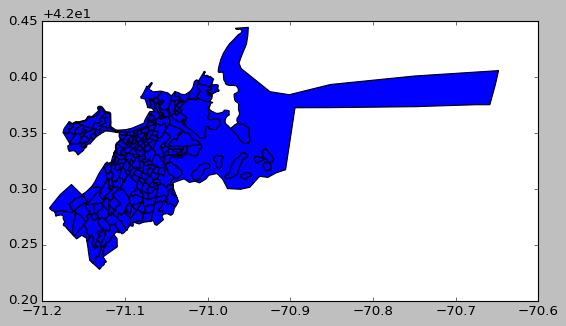

In [ ]:
boston.plot()

In [ ]:
import mplleaflet

f = plt.figure(figsize=(15, 8))
ax = f.gca()
boston.plot(ax=ax)
mplleaflet.display(fig=f)

In [ ]:
import shapely
listings = gpd.GeoDataFrame(listings, geometry=listings.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

Plotting Geometries and points

In [ ]:
import seaborn as sns

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

boston.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')
sns.kdeplot(data=listings.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), ax=ax,
            alpha=1)
ax.set_axis_off()


In [ ]:
import numpy as np

def assign_census_tract(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston['geometry']]
    if True in bools:
        return boston.iloc[bools.index(True)]['NAMELSAD10']
    else:
        return np.nan

In [ ]:
listings['census_tract'] = listings.apply(assign_census_tract, axis='columns')

In [ ]:
listings['census_tract'].value_counts().head()

Census Tract 701.01    113
Census Tract 102.03    111
Census Tract 8.02       95
Census Tract 201.01     86
Census Tract 606        84
Name: census_tract, dtype: int64

In [ ]:
boston['BNBs'] = boston['NAMELSAD10'].map(listings['census_tract'].value_counts())
boston['BNBs']

0      11.0
1      27.0
2      39.0
3      29.0
4      41.0
       ... 
176    35.0
177    86.0
178    24.0
179    35.0
180    56.0
Name: BNBs, Length: 181, dtype: float64

In [ ]:
pip install PySal

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 209 kB 11.2 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
     |████████████████████████████████| 243 kB 57.1 MB/s 
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 41 kB 514 kB/s 
     |████████████████████████████████| 147 kB 32.3 MB/s 
     |████████████████████████████████| 5.7 MB 22.1 MB/s 
     |████████████████████████████████| 95 kB 3.9 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 179 kB 53.1 MB/s 
     |████████████████████████████████| 2.1 MB 37.4 MB/s 
     |████████████████████████████████| 66.7 MB 26 kB/s 
     |████████████████████████████████| 183 kB 55.0 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 1.0 MB 55.0 MB/s 
     |████████████████████████████████| 14.2 MB 28.1 MB/s 
  Using cached rasterio-1.2.

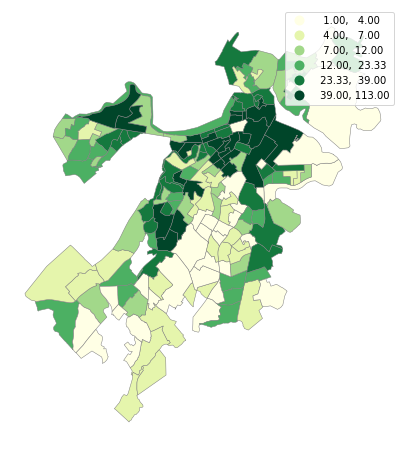

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()
kw = dict(column='BNBs', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
boston.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()


In [ ]:
boston['BNBDensity'] = (boston['BNBs'] / boston['geometry']\
                            .to_crs({'init': 'epsg:3395'})\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


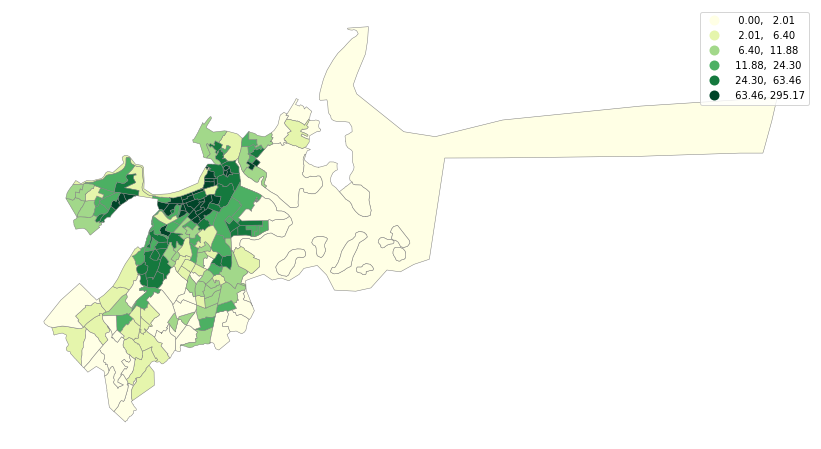

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()
kw = dict(column='BNBDensity', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
boston.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

SPATIAL **WEIGHTS**

In [ ]:
import libpysal as lps
import numpy as np

In [ ]:
shp_path = 'Census2010_Tracts.shp'

In [ ]:
qW = lps.weights.Queen.from_shapefile(shp_path)



In [ ]:
qW[4]

{6: 1.0, 10: 1.0, 50: 1.0, 80: 1.0}

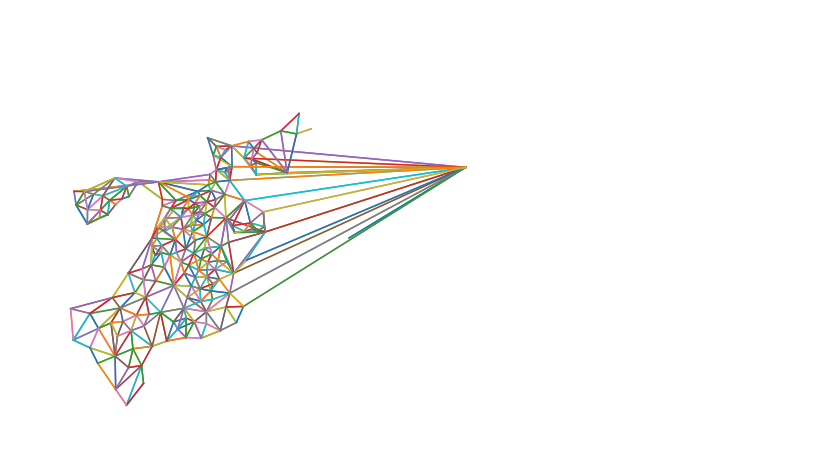

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

for i, (k, neighbors) in enumerate(qW.neighbors.items()):
    origin = boston.geometry.iloc[i].centroid
    for nabe_i in neighbors:
        nabe_centroid = boston.geometry.iloc[nabe_i].centroid
        plt.plot([origin.x, nabe_centroid.x], [origin.y, nabe_centroid.y], '-')

boston.plot(ax=ax, linewidth=0.5, facecolor='white')

ax.set_axis_off()

Now you can see clearly

(42.325, 42.375)

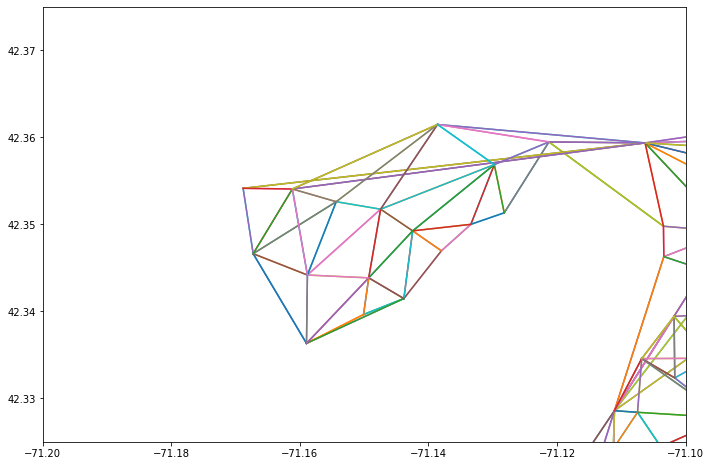

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

for i, (k, neighbors) in enumerate(qW.neighbors.items()):
    origin = boston.geometry.iloc[i].centroid
    for nabe_i in neighbors:
        nabe_centroid = boston.geometry.iloc[nabe_i].centroid
        plt.plot([origin.x, nabe_centroid.x], [origin.y, nabe_centroid.y], '-')

boston.plot(ax=ax, linewidth=1, facecolor='white')

ax.set_xlim([-71.2, -71.1])
ax.set_ylim([42.325, 42.375])

**SPATIAL LAG**

In [ ]:
import mapclassify as mc
bnb_spatial_lags = lps.weights.lag_spatial(qW, boston['BNBDensity'])
spatial_lag_classes = mc.Quantiles(bnb_spatial_lags, k=5)

In [ ]:
spatial_lag_classes

Quantiles                 

     Interval        Count
--------------------------
[   0.00,   24.42] |    37
(  24.42,   59.60] |    36
(  59.60,  136.94] |    36
( 136.94,  281.67] |    36
( 281.67, 1132.69] |    36

In [ ]:
spatial_lag_classes.yb

array([4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 3, 3, 2, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 3, 4, 1, 0, 2, 0, 0, 1, 1,
       1, 2, 2, 3, 3, 2, 1, 0, 4, 3, 1, 3, 2, 2, 3, 4, 4, 3, 1, 3, 4, 0,
       0, 0, 2, 0, 0, 1, 1, 4, 4, 4, 4, 4, 3, 4, 4, 2, 3, 2, 3, 2, 0, 1,
       0, 3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 4, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 1, 2, 3, 2, 3, 1, 4, 2, 2, 2, 2, 1, 1, 3, 4, 4, 4,
       4, 4, 3, 4, 2])

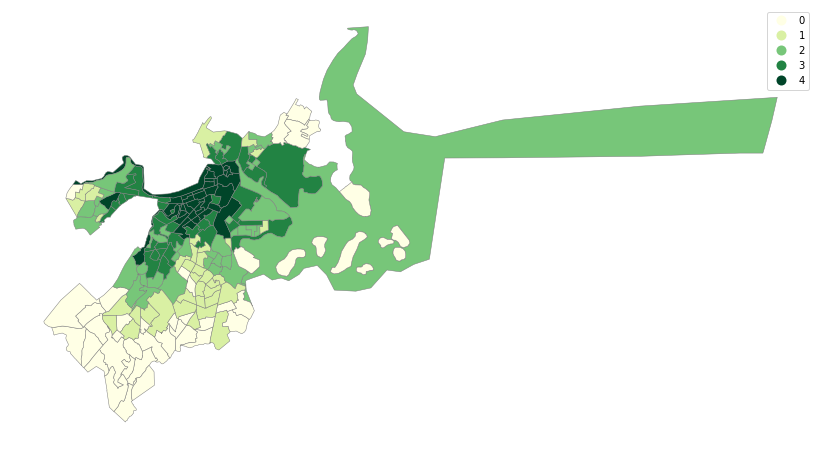

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='spatial_class', k=5, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, 
          categorical=True)
boston.assign(spatial_class=spatial_lag_classes.yb).plot(ax=ax, **kw)
ax.set_axis_off()

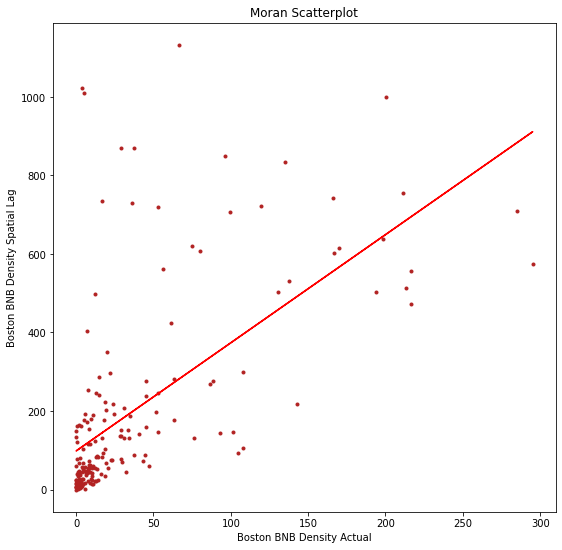

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(boston['BNBDensity'], bnb_spatial_lags, '.', color='firebrick')

# Calculate and plot a line of best fit.
b,a = np.polyfit(boston['BNBDensity'], bnb_spatial_lags, 1)
plt.plot(boston['BNBDensity'], a + b*boston['BNBDensity'], 'r')

plt.title('Moran Scatterplot')
plt.ylabel('Boston BNB Density Spatial Lag')
plt.xlabel('Boston BNB Density Actual')
plt.show()


In [ ]:
from esda.moran import Moran

We can get a p-value

In [ ]:
moran = Moran(boston['BNBDensity'].values, qW)
moran.I, moran.p_sim

(0.5279124549042942, 0.001)

**SPATIAL CLUSTERING**

In [ ]:
listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [ ]:
apartments = listings.query('property_type == "Apartment" or property_type == "Condominium"').groupby('census_tract').count()['id']
houses = listings.query('property_type == "House" or property_type == "Townhouse"').groupby('census_tract').count()['id']

Let's create numerical variables counting how many of each we have per census tract.

In [ ]:
boston['BNBDensity_Houses'] = boston['NAMELSAD10'].map(houses).fillna(0)
boston['BNBDensity_Apartments'] = boston['NAMELSAD10'].map(apartments).fillna(0)

We have three predictor variables that we'd like to use: the number of apartments, the numbers of houses, and their density combined.

In [ ]:
bnb_market = boston[['BNBDensity', 'BNBDensity_Houses', 'BNBDensity_Apartments']]

In [ ]:
import sklearn.cluster
import sklearn.preprocessing

clf = sklearn.cluster.KMeans(n_clusters=3)
X = sklearn.preprocessing.scale(bnb_market.values)
classes = clf.fit(X)

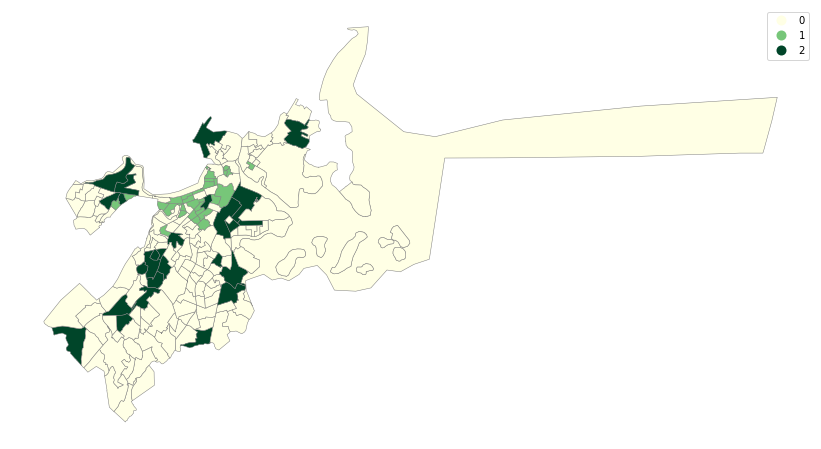

In [ ]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='cluster', k=3, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
boston.assign(cluster=classes.labels_).plot(ax=ax, **kw)
ax.set_axis_off()

Our classifier does seem to have learned, in effect, the difference between low-density outlying tracts, medium-density tracts, and high-density inner city tracts:

In [ ]:
bnb_market.assign(cluster=classes.labels_).groupby('cluster').mean()

BNBDensity  BNBDensity_Houses  BNBDensity_Apartments
cluster                                                      
0         12.233624           2.062992               6.740157
1        149.154101           1.571429              47.464286
2         31.235665          11.615385              23.884615

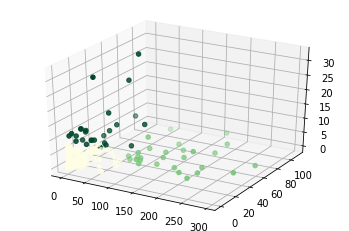

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bnb_market['BNBDensity'], bnb_market['BNBDensity_Apartments'],
           zs=bnb_market['BNBDensity_Houses'], c=classes.labels_, cmap='YlGn')

The pale census tracts are those which have very little AirBnB activity at all. They tend to be furthest from the city center. The second class of tracts, the dark green ones, have a significant BnB density, but consist primarily of houses, not apartments; these correspond with middle-of-the-pack residential areas. Finally, the densest areas, tracts containing plenty of apartments for rent but no homes and located in the heart of the city, are pale green.

This is perfect! Right?

Well, it is, except that the areas we've binned are discontinuous. Because our classifier disregards geography it doesn't put in any effort keeping our class members next one another, and so we don't arrive at any understanding of neighborhood topography.

pysal contains classifiers that allow us to do just that. Cheif amongst them is the Maxp clustering algorithm, which chooses clusters which match each other characteristically and are also all next to one another (according to whatever definition of neighbors you choose—we'll keep going with queen contiguity).

Here's what we get when we run it. Notice the place of our spatial weights in the input, as well as a minimum number of observations per class—150.

In [ ]:
#clf =ps.region.MaxP(qW, bnb_market.values, 150, boston['BNBs'].values[:,None])

In [ ]:
"""
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='cluster', k=10, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
boston.assign(cluster=clf.area2region.values()).plot(ax=ax, **kw)
ax.set_axis_off()
"""


"\nf = plt.figure(figsize=(15, 8))\nax = f.gca()\n\nkw = dict(column='cluster', k=10, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)\nboston.assign(cluster=clf.area2region.values()).plot(ax=ax, **kw)\nax.set_axis_off()\n"

In [ ]:
#bnb_market.assign(cluster=clf.area2region.values()).groupby('cluster').mean()

**SPATIAL REGRESSION**

 we're interested in modeling the price of a BnB. Let's use the following basic features to do it:



In [ ]:
explanatory_variables = ['bathrooms', 'bedrooms', 'beds', 'guests_included']

In [ ]:
import statsmodels.api as sm

def convert_price(price):
    try:
        return float(price.replace("$", "").replace(".", "")[:-2])
    except (ValueError, AttributeError):
        return np.nan


price_variables = ['price', 'cleaning_fee']
geom = ['latitude', 'longitude']  # we'll need this later
valid_listings = listings[explanatory_variables + price_variables + geom].dropna()
valid_listings['actual_price'] = valid_listings['price'].map(convert_price) +\
                                 valid_listings['cleaning_fee'].map(convert_price)
valid_listings = valid_listings.dropna()

clf = sm.OLS(valid_listings['actual_price'], valid_listings[explanatory_variables])
basic_ols_res = clf.fit()

In [ ]:

basic_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           actual_price   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              2808.
Date:                Sat, 21 May 2022   Prob (F-statistic):                        0.00
Time:                        08:09:59   Log-Likelihood:                         -15293.
No. Observations:                2460   AIC:                                  3.059e+04
Df Residuals:                    2456   BIC:                                  3.062e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bathrooms          86.6214      4.185     20.699      0.000      78.415      94.828
bedrooms           38.2459      4.722      8.099      0.000      28.986      47.505
beds               36.4452      3.642     10.006      0.000      29.303      43.588
guests_included    12.0422      2.316      5.199      0.000       7.500      16.585
==============================================================================
Omnibus:                      172.427   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.583
Skew:                           0.592   Prob(JB):                     3.48e-53
Kurtosis:                       3.977   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
w = lps.weights.KNN(valid_listings[['longitude', 'latitude']].dropna().values, k=2)
w

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 185 disconnected components.
  warnings.warn(message)


In [ ]:
import spreg
geospatial_ols = spreg.GM_Lag(valid_listings['actual_price'].values[:, None],
                                 valid_listings[explanatory_variables].values,
                                 w=w,
                                 name_x=explanatory_variables,
                                 name_y='actual_price')

In [ ]:
print(geospatial_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :actual_price                Number of Observations:        2460
Mean dependent var  :    246.6793                Number of Variables   :           6
S.D. dependent var  :    145.2765                Degrees of Freedom    :        2454
Pseudo R-squared    :      0.2996
Spatial Pseudo R-squared:  0.3265

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      74.5257846      11.4683038       6.4984139       0.0000000
           bathrooms      48.5721848       6.0617495       8.0128988       0.0000000
            bedrooms      39.4847512       4.7342175       

In [ ]:
geospatial_ols_mse = ((valid_listings['actual_price'] - geospatial_ols.predy.flatten()) ** 2).mean()
print("OLS".ljust(5), ":", basic_ols_res.mse_total)
print("OLS+W".ljust(5), ":", geospatial_ols_mse)

OLS   : 81947.35243902438
OLS+W : 14788.387329874082


 in this case we've shown pretty conclusively just the opposite: that the price of a BnB has little to do with the prices set by its neighbors

In [ ]:
amenities = listings['amenities'].map(lambda d: [amenity.replace('"', "")\
                                                        .replace("{", "")\
                                                        .replace("}", "") for amenity in d.split(",")])
listings['amenities'] = amenities
possible_amenities = set([item for sublist in amenities for item in sublist])
possible_amenities

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}